In [24]:
import torch
from torch import nn
from d2l import torch as d2l

In [25]:
def dropout_layer( X , dropout ):
    assert 0 <= dropout <= 1
    if dropout == 1:
        return torch.zeros_like( X )
    if dropout == 0:
        return X
    mask = (torch.Tensor(X.shape).uniform_(0, 1) > dropout).float()
    return mask * X / (1.0 - dropout)

In [26]:
X= torch.arange(16, dtype = torch.float32).reshape((2, 8))
print(X)
print(dropout_layer(X, 0.))
print(dropout_layer(X, 0.5))
print(dropout_layer(X, 1.))


tensor([[ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11., 12., 13., 14., 15.]])
tensor([[ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11., 12., 13., 14., 15.]])
tensor([[ 0.,  0.,  0.,  0.,  8.,  0.,  0., 14.],
        [16.,  0.,  0., 22.,  0.,  0., 28.,  0.]])
tensor([[0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.]])


In [27]:
num_inputs, num_outputs, num_hiddens1, num_hiddens2 = 784, 10, 256, 256

In [28]:
dropout1 , dropout2  = 0.2 , 0.5 
class Net( nn.Module ):
    def __init__( self , num_inputs , num_hiddens1 , num_hiddens2 , num_outputs ,is_train = True ):
        super().__init__()
        self.num_inputs = num_inputs
        self.training = is_train
        self.lin1 = nn.Linear( num_inputs , num_hiddens1 )
        self.lin2 = nn.Linear( num_hiddens1 , num_hiddens2 )
        self.lin3 = nn.Linear( num_hiddens2 , num_outputs )
        self.relu = nn.ReLU()
    def forward( self , X ):
        H1 = self.relu( self.lin1(  X.reshape( -1 , self.num_inputs )  ))
        if self.training == True:
            H1 = dropout_layer( H1 , dropout1  )
        H2 = self.relu( self.lin2( H1 ) )
        if self.training == True:
            H2 = dropout_layer( H2 , dropout2 )
        output = self.lin3( H2 )
        return output 
net = Net( num_inputs ,num_hiddens1 , num_hiddens2 , num_outputs )

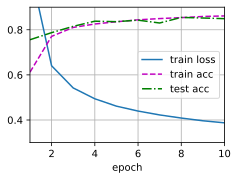

In [29]:
num_epochs , lr , batch_size = 10 , 0.1 , 256
train_iter ,test_iter = d2l.load_data_fashion_mnist( batch_size )
loss = nn.CrossEntropyLoss()
trainer = torch.optim.SGD( net.parameters() , lr=lr )
d2l.train_ch3( net , train_iter ,test_iter , loss , num_epochs , trainer )